### Handling Outliers

#### 3-sigma technique (Standard deviation)
Any data value that lies beyond ± 3 sd is treated as an outlier

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics

In [3]:
data = pd.read_csv('datasets/raw_sales.csv')

In [4]:
def find_anomalies(data):
    anomalies = []
    std = statistics.stdev(data)  #calculate the standard deviation of the data
    mean = statistics.mean(data)  #calculate the mean of the data
    cutoff  = std * 3  #calculate the anomaly cutoff which is 3xstandard deviation
    lower = mean - cutoff  #calculate the lower limit
    upper = mean + cutoff #calculate the upper limit

    for i in data:  #iterate through the data
        if i>upper or i<lower:  #if the value is less than lower limit or greater the upper limit
            anomalies.append(i)  #append it in the anomalies list
    return anomalies



In [5]:
anomalies_in_price = find_anomalies(data['price'])

In [6]:
print(len(anomalies_in_price))

461


In [7]:
data.price.skew()

np.float64(4.312009366902366)

In [8]:
import seaborn as sns

<Axes: xlabel='price', ylabel='Density'>

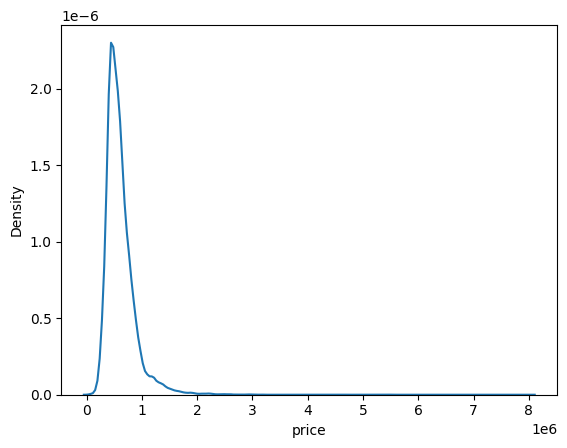

In [9]:
sns.kdeplot(data.price)

In [10]:
data['price_trnasformed'] = np.log(data.price)

In [11]:
data.price_trnasformed.skew()

np.float64(0.4731646269984763)

In [12]:
len(find_anomalies(data.price_trnasformed))

266

<Axes: xlabel='price_trnasformed', ylabel='Density'>

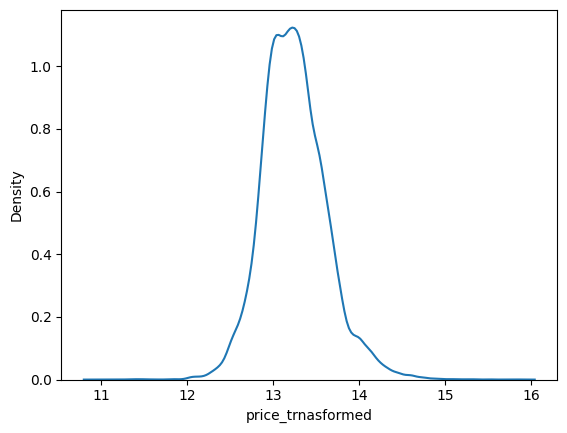

In [14]:
sns.kdeplot(data.price_trnasformed)